In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install kaggle  # Install Kaggle API client

# Upload your Kaggle API key (kaggle.json)
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# Download the dataset using the API
!kaggle datasets download -d sshikamaru/glaucoma-detection

Dataset URL: https://www.kaggle.com/datasets/sshikamaru/glaucoma-detection
License(s): CC0-1.0
 91% 366M/402M [00:02<00:00, 85.7MB/s]
100% 402M/402M [00:02<00:00, 149MB/s] 


In [ ]:
# Unzip the dataset (if it's a zip file)
!unzip glaucoma-detection.zip

Archive:  glaucoma-detection.zip
  inflating: ACRIMA/Images/Im001_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im002_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im003_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im004_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im005_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im006_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im007_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im008_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im009_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im010_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im011_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im012_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im013_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im014_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im015_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im016_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im017_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im018_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im019_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im020_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im021_ACRIMA.jpg  
 

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
import os

file_path = "/content/ORIGA/ORIGA/Images"

# List all files in the directory
all_files = os.listdir(file_path)

jpg_files = [file for file in all_files if file.lower().endswith(".jpg")]
# Count the number of images
print("Number of images:", len(jpg_files))


Number of images: 650


In [ ]:
file_path = "/content/glaucoma.csv"
data = pd.read_csv(file_path)
print("Number of rows:", data.shape[0])
print("Number of columns:",data.shape[1])
print("Column names:", data.columns.tolist())

Number of rows: 650
Number of columns: 5
Column names: ['Filename', 'ExpCDR', 'Eye', 'Set', 'Glaucoma']


In [ ]:
for column in data.columns:
    print(f"Unique values in '{column}':")
    print(data[column].unique(), "\n")

Unique values in 'Filename':
['001.jpg' '002.jpg' '003.jpg' '004.jpg' '005.jpg' '006.jpg' '007.jpg'
 '008.jpg' '009.jpg' '010.jpg' '011.jpg' '012.jpg' '013.jpg' '014.jpg'
 '015.jpg' '016.jpg' '017.jpg' '018.jpg' '019.jpg' '020.jpg' '021.jpg'
 '022.jpg' '023.jpg' '024.jpg' '025.jpg' '026.jpg' '027.jpg' '028.jpg'
 '029.jpg' '030.jpg' '031.jpg' '032.jpg' '033.jpg' '034.jpg' '035.jpg'
 '036.jpg' '037.jpg' '038.jpg' '039.jpg' '040.jpg' '041.jpg' '042.jpg'
 '043.jpg' '044.jpg' '045.jpg' '046.jpg' '047.jpg' '048.jpg' '049.jpg'
 '050.jpg' '051.jpg' '052.jpg' '053.jpg' '054.jpg' '055.jpg' '056.jpg'
 '057.jpg' '058.jpg' '059.jpg' '060.jpg' '061.jpg' '062.jpg' '063.jpg'
 '064.jpg' '065.jpg' '066.jpg' '067.jpg' '068.jpg' '069.jpg' '070.jpg'
 '071.jpg' '072.jpg' '073.jpg' '074.jpg' '075.jpg' '076.jpg' '077.jpg'
 '078.jpg' '079.jpg' '080.jpg' '081.jpg' '082.jpg' '083.jpg' '084.jpg'
 '085.jpg' '086.jpg' '087.jpg' '088.jpg' '089.jpg' '090.jpg' '091.jpg'
 '092.jpg' '093.jpg' '094.jpg' '095.jpg' '096.jp

In [ ]:
display(data.info())
display(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Filename  650 non-null    object 
 1   ExpCDR    650 non-null    float64
 2   Eye       650 non-null    object 
 3   Set       650 non-null    object 
 4   Glaucoma  650 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 25.5+ KB


None

,0
Filename,0
ExpCDR,0
Eye,0
Set,0
Glaucoma,0


Glaucoma distribution:
Glaucoma
0    482
1    168
Name: count, dtype: int64


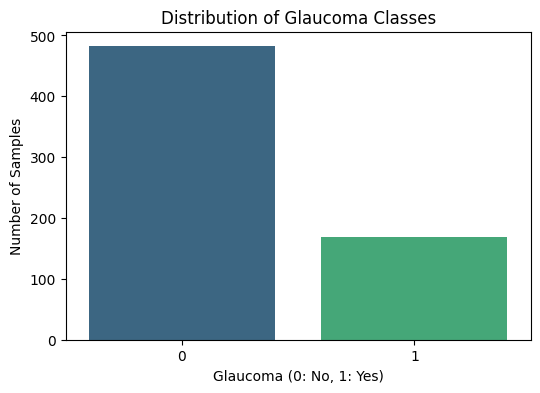

In [ ]:
import seaborn as sns
# Count the occurrences of each class in the 'Glaucoma' column
glaucoma_counts = data['Glaucoma'].value_counts()

# Print the counts to check for imbalance
print("Glaucoma distribution:")
print(glaucoma_counts)

# Plotting the bar chart to visualize the imbalance
plt.figure(figsize=(6, 4))
sns.barplot(x=glaucoma_counts.index, y=glaucoma_counts.values, palette="viridis")
plt.title('Distribution of Glaucoma Classes')
plt.xlabel('Glaucoma (0: No, 1: Yes)')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

In [ ]:


# Paths
base_dir = "/content/ORIGA/ORIGA"
csv_file_path = "/content/glaucoma.csv"
image_dir = os.path.join(base_dir, "Images")
output_dir = "/content/organized_data"

# Load the CSV file
data = pd.read_csv(csv_file_path)

# Create output directories for 'yes' and 'no'
yes_folder = os.path.join(output_dir, "yes")
no_folder = os.path.join(output_dir, "no")

# Subfolders for images and CSVs
yes_images_folder = os.path.join(yes_folder, "images")
yes_csv_folder = os.path.join(yes_folder, "csv")
no_images_folder = os.path.join(no_folder, "images")
no_csv_folder = os.path.join(no_folder, "csv")

# Create all necessary folders
os.makedirs(yes_images_folder, exist_ok=True)
os.makedirs(yes_csv_folder, exist_ok=True)
os.makedirs(no_images_folder, exist_ok=True)
os.makedirs(no_csv_folder, exist_ok=True)

# Separate data based on 'Glaucoma' values
yes_data = data[data["Glaucoma"] == 1]
no_data = data[data["Glaucoma"] == 0]

# Function to organize images and save CSVs
def organize_data(subset_data, images_folder, csv_folder):
    for _, row in subset_data.iterrows():
        filename = row["Filename"]
        src_path = os.path.join(image_dir, filename)
        dest_path = os.path.join(images_folder, filename)

        # Copy image
        if os.path.exists(src_path):
            shutil.copy(src_path, dest_path)

    # Save corresponding CSV in the 'csv' subfolder
    csv_path = os.path.join(csv_folder, "data.csv")
    subset_data.to_csv(csv_path, index=False)

# Organize data for 'yes' and 'no' classes
organize_data(yes_data, yes_images_folder, yes_csv_folder)
organize_data(no_data, no_images_folder, no_csv_folder)

print(f"Data organized into 'yes' and 'no' folders with separate subfolders for images and CSVs!")


Data organized into 'yes' and 'no' folders with separate subfolders for images and CSVs!


In [ ]:
no_path = "/content/organized_data/no/images"
yes_path = "/content/organized_data/yes/images"
# List all files in the directory
nofiles = os.listdir(no_path)
yesfiles = os.listdir(yes_path)

no_files = [file for file in nofiles if file.lower().endswith(".jpg")]
yes_files = [file for file in yesfiles if file.lower().endswith(".jpg")]
# Count the number of images
print("Number of images in no directory:", len(no_files))
print("Number of images in yes directory:", len(yes_files))


Number of images in no directory: 482
Number of images in yes directory: 168


In [ ]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
yes_images_folder = "/content/organized_data/yes/images"
output_dir = "/content/organized_data/aug_yes"
aug_images_folder = os.path.join(output_dir, "images")
aug_csv_folder = os.path.join(output_dir, "csv")
yes_csv_path = "/content/organized_data/yes/csv/data.csv"

# Load the CSV file
yes_data = pd.read_csv(yes_csv_path)

# Create output directories for augmented data
os.makedirs(aug_images_folder, exist_ok=True)
os.makedirs(aug_csv_folder, exist_ok=True)

# Define augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

# List to store new rows for CSV
augmented_rows = []

# Augment Images and Create New Data
for _, row in yes_data.iterrows():
    filename = row["Filename"]
    src_path = os.path.join(yes_images_folder, filename)

    if os.path.exists(src_path):
        # Load the original image
        img = Image.open(src_path)
        img_array = np.expand_dims(np.array(img), axis=0)

        # Save the original image to the new folder
        new_filename = filename
        new_path = os.path.join(aug_images_folder, new_filename)
        img.save(new_path)

        # Add the original image row to augmented_rows
        new_row = row.copy()
        new_row["Filename"] = new_filename
        augmented_rows.append(new_row)

        # Generate 2 augmented images
        i = 1
        for batch in datagen.flow(img_array, batch_size=1):
            augmented_filename = f"{os.path.splitext(filename)[0]}_{i}.jpg"
            augmented_image_path = os.path.join(aug_images_folder, augmented_filename)

            # Save the augmented image
            augmented_img = Image.fromarray(batch[0].astype("uint8"))
            augmented_img.save(augmented_image_path)

            # Add new augmented image row to augmented_rows
            new_augmented_row = row.copy()
            new_augmented_row["Filename"] = augmented_filename
            augmented_rows.append(new_augmented_row)

            i += 1
            if i > 2:  # We need exactly 2 augmented images (total of 3 images: original + 2 augmented)
                break

# Save updated CSV with 3 images (original + 2 augmented) for each entry
augmented_data = pd.DataFrame(augmented_rows)
augmented_data.to_csv(os.path.join(aug_csv_folder, "data.csv"), index=False)

print(f"Augmented images saved to '{aug_images_folder}' and CSV updated at '{aug_csv_folder}/data.csv'.")


Augmented images saved to '/content/organized_data/aug_yes/images' and CSV updated at '/content/organized_data/aug_yes/csv/data.csv'.


In [ ]:
file_path = "/content/organized_data/aug_yes/images"

# List all files in the directory
all_files = os.listdir(file_path)

aug_files = [file for file in all_files if file.lower().endswith(".jpg")]
# Count the number of images
print("Number of total augmented images:", len(aug_files))


Number of total augmented images: 504


In [ ]:
file_path = "/content/organized_data/aug_yes/csv/data.csv"
df = pd.read_csv(file_path)
print("Number of rows:", df.shape[0])
print("Number of columns:",df.shape[1])
print("Column names:", df.columns.tolist())

Number of rows: 504
Number of columns: 5
Column names: ['Filename', 'ExpCDR', 'Eye', 'Set', 'Glaucoma']


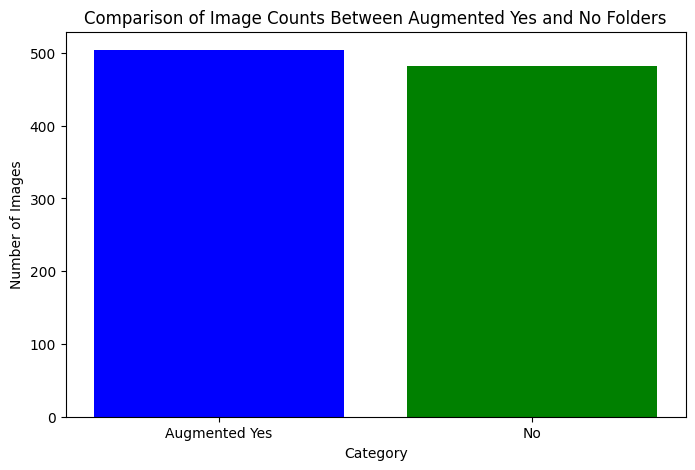

In [ ]:

# Paths to the image folders
aug_yes_images_folder = "/content/organized_data/aug_yes/images"
no_images_folder = "/content/organized_data/no/images"

# Count the number of images in each folder
num_aug_yes_images = len([img for img in os.listdir(aug_yes_images_folder) if img.endswith(".jpg")])
num_no_images = len([img for img in os.listdir(no_images_folder) if img.endswith(".jpg")])

# Data for the bar chart
categories = ['Augmented Yes', 'No']
counts = [num_aug_yes_images, num_no_images]

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(categories, counts, color=['blue', 'green'])
plt.title('Comparison of Image Counts Between Augmented Yes and No Folders')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.grid(False)
plt.show()


*Dataset is balanced .*

In [ ]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import to_categorical

# Paths for aug_yes and no
aug_yes_csv_path = "/content/organized_data/aug_yes/csv/data.csv"
aug_yes_images_folder = "/content/organized_data/aug_yes/images"

no_csv_path = "/content/organized_data/no/csv/data.csv"
no_images_folder = "/content/organized_data/no/images"

# Load CSVs
data_yes = pd.read_csv(aug_yes_csv_path)
data_yes['label'] = 1  # Assign label 1 for "yes"

data_no = pd.read_csv(no_csv_path)
data_no['label'] = 0  # Assign label 0 for "no"

# Combine both classes and shuffle
data = pd.concat([data_yes, data_no], ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split data into train, validation, and test sets (70:15:15) while maintaining label balance
train_data, temp_data = train_test_split(data, test_size=0.3, stratify=data['label'], random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['label'], random_state=42)

# Function to preprocess images and create data lists
def preprocess_and_load_data(data_subset, folder_paths):
    images = []
    labels = []

    for _, row in data_subset.iterrows():
        filename = row["Filename"]
        label = row["label"]
        # Determine the folder based on the label
        image_folder = folder_paths['yes'] if label == 1 else folder_paths['no']
        image_path = os.path.join(image_folder, filename)

        if os.path.exists(image_path):
            # Load the image and resize to (224, 224) for ResNet50
            img = load_img(image_path, target_size=(224, 224))
            img_array = img_to_array(img)
            img_preprocessed = preprocess_input(img_array)  # Preprocess for ResNet50

            images.append(img_preprocessed)
            labels.append(label)

    return np.array(images), np.array(labels)

# Define image folder paths for both labels
folder_paths = {
    "yes": aug_yes_images_folder,
    "no": no_images_folder
}

# Preprocess and load data for train, validation, and test sets
train_images, train_labels = preprocess_and_load_data(train_data, folder_paths)
valid_images, valid_labels = preprocess_and_load_data(valid_data, folder_paths)
test_images, test_labels = preprocess_and_load_data(test_data, folder_paths)

# One-hot encode the labels
num_classes = 2  # Glaucoma has two classes: 0 and 1
train_labels = to_categorical(train_labels, num_classes=num_classes)
valid_labels = to_categorical(valid_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)

# Output the shapes of the data
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Validation images shape: {valid_images.shape}")
print(f"Validation labels shape: {valid_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

# Print class distribution in each split
print("Class distribution in Train:", np.sum(train_labels, axis=0))
print("Class distribution in Validation:", np.sum(valid_labels, axis=0))
print("Class distribution in Test:", np.sum(test_labels, axis=0))


Train images shape: (690, 224, 224, 3)
Train labels shape: (690, 2)
Validation images shape: (148, 224, 224, 3)
Validation labels shape: (148, 2)
Test images shape: (148, 224, 224, 3)
Test labels shape: (148, 2)
Class distribution in Train: [337. 353.]
Class distribution in Validation: [72. 76.]
Class distribution in Test: [73. 75.]


In [ ]:
# Define data augmentation for the training set
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define ResNet50 model
def create_resnet50_model(input_shape, num_classes):
    # Load ResNet50 base model with pre-trained weights
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the base model layers for transfer learning
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom classification layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Compile the model
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss=tf.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model

In [ ]:
def lr_schedule(epoch, lr):
    # Example: Decrease learning rate by 10% every 5 epochs
    if epoch % 5 == 0 and epoch > 0:
        lr *= 0.9
    return float(lr)  # Ensure the return value is a float

# Create LearningRateScheduler callback with the corrected schedule function
learning_rate_scheduler = LearningRateScheduler(lr_schedule)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

In [ ]:
# Model configuration
input_shape = (224, 224, 3)
num_classes = 2  # Yes and No classes
model = create_resnet50_model(input_shape, num_classes)

# Training the model
history = model.fit(
    data_gen.flow(train_images, train_labels, batch_size=32),
    epochs=15,
    validation_data=(valid_images, valid_labels),
    callbacks=[early_stopping, learning_rate_scheduler]
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6071 - loss: 0.6831 - val_accuracy: 0.7703 - val_loss: 0.5236 - learning_rate: 1.0000e-04
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 416ms/step - accuracy: 0.7629 - loss: 0.5086 - val_accuracy: 0.7027 - val_loss: 0.5887 - learning_rate: 1.0000e-04
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 367ms/step - accuracy: 0.7795 - loss: 0.4863 - val_accuracy: 0.7432 - val_loss: 0.5543 - learning_rate: 1.0000e-04
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 409ms/step - accuracy: 0.7784 - loss: 0.4803 - val_accuracy: 0.7635 - val_loss: 0.5178 - learning_rate: 1.0000e-04
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 417ms/step - accuracy: 0.8229 - loss: 0.4050 - val_accuracy: 0.7432 - val_loss: 0.5772 - learning_rate: 1.0000e-04
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 397ms/step - accuracy: 0.8051 - loss: 0.4441 - val_accuracy: 0.7365 - val_loss: 0.5870 - learning_rate: 9.0000e-05
Epoch 7/15
22/2

In [ ]:
# Create directory if it doesn't exist
save_dir = '/content/working'
os.makedirs(save_dir, exist_ok=True)

# Ensure file paths are valid
weights_path = './resnet50_model_weights.weights.h5'
model_path = './resnet50_model.h5'

# Debug paths
print(f"Saving weights to: {weights_path}")
print(f"Saving model to: {model_path}")

# Save weights and model
model.save_weights(weights_path)
model.save(model_path)

print("Model and weights saved successfully!")

Saving weights to: ./resnet50_model_weights.weights.h5
Saving model to: ./resnet50_model.h5


Model and weights saved successfully!


In [ ]:
# Evaluate the model
results = model.evaluate(valid_images, valid_labels, batch_size=32)
print(f"Validation Loss: {results[0]}, Validation Accuracy: {results[1]}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.8258 - loss: 0.4218
Validation Loss: 0.4449797570705414, Validation Accuracy: 0.8108108043670654


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Debug: Check test shapes and content
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")
print(f"Test labels content: {test_labels[:10]}")  # Sample labels

# If test_labels is already in integer format, use it directly
test_labels_int = test_labels if len(test_labels.shape) == 1 else np.argmax(test_labels, axis=1)

# Load your trained model
model = tf.keras.models.load_model("/content/resnet50_model.h5")  # Path to your trained model

# Predict using the trained model
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)  # Convert predictions to class indices

# Calculate accuracy
accuracy = accuracy_score(test_labels_int, predicted_classes)
print(f"Manual Test Accuracy: {accuracy * 100:.2f}%")

# Classification Report
unique_classes = np.unique(test_labels_int)  # Get unique classes
target_names = [f"Class {cls}" for cls in unique_classes]  # Dynamically create target names

print("\nClassification Report:")
print(classification_report(test_labels_int, predicted_classes, target_names=target_names))

# Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(test_labels_int, predicted_classes)
print(conf_matrix)

#  print predictions for each image
for i, (true_label, pred_label) in enumerate(zip(test_labels_int, predicted_classes)):
    print(f"Image {i + 1}: True Label: {true_label}, Predicted Label: {pred_label}")


Test images shape: (148, 224, 224, 3)
Test labels shape: (148, 2)
Test labels content: [[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 856ms/step
Manual Test Accuracy: 74.32%

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.67      0.93      0.78        73
     Class 1       0.89      0.56      0.69        75

    accuracy                           0.74       148
   macro avg       0.78      0.75      0.74       148
weighted avg       0.78      0.74      0.73       148


Confusion Matrix:
[[68  5]
 [33 42]]
Image 1: True Label: 1, Predicted Label: 1
Image 2: True Label: 1, Predicted Label: 0
Image 3: True Label: 0, Predicted Label: 0
Image 4: True Label: 1, Predicted Label: 1
Image 5: True Label: 1, Predicted Label: 1
Image 6: True Label: 0, Predicted Label: 0
Image 7: True Label: 0, Predicted Label: 0
Image 8: True Label: 0, Predicted Label: 0
Image 9: True Label: 1, Predicted Label: 1
Image 10: True Label: 1, Predicted Label: 1
Image 11: True Label: 1, Predicted Label: 0
Image 12: True Label: 0, Predicted Label: 1
Image 13: True Label: 0,

# VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

# Define VGG16 model
def create_vgg16_model(input_shape, num_classes):
    # Load the VGG16 base model with pre-trained weights
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the base model layers for transfer learning
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom classification layers
    x = base_model.output
    x = Flatten()(x)  # Flatten the output of the base model
    x = Dense(256, activation='relu')(x)  # Fully connected layer
    x = Dropout(0.5)(x)  # Dropout for regularization
    predictions = Dense(num_classes, activation='softmax')(x)  # Final classification layer

    # Compile the model
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
learning_rate_scheduler = LearningRateScheduler(lr_schedule)


In [ ]:
# Model configuration
input_shape = (224, 224, 3)
num_classes = 2  # Yes and No classes
vgg16_model = create_vgg16_model(input_shape, num_classes)

# Train the VGG16 model
history_vgg16 = vgg16_model.fit(
    train_images,  # Training images
    train_labels,  # One-hot encoded training labels
    batch_size=32,
    epochs=8,
    validation_data=(valid_images, valid_labels),  # Validation data
    callbacks=[early_stopping, learning_rate_scheduler]
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/14
22/22 ━━━━━━━━━━━━━━━━━━━━ 532s 24s/step - accuracy: 0.6623 - loss: 4.5530 - val_accuracy: 0.7770 - val_loss: 1.2921 - learning_rate: 1.0000e-04
Epoch 2/14
22/22 ━━━━━━━━━━━━━━━━━━━━ 467s 21s/step - accuracy: 0.8076 - loss: 1.7948 - val_accuracy: 0.8311 - val_loss: 0.9161 - learning_rate: 1.0000e-04
Epoch 3/14
22/22 ━━━━━━━━━━━━━━━━━━━━ 468s 21s/step - accuracy: 0.8557 - loss: 0.8261 - val_accuracy: 0.8378 - val_loss: 0.5216 - learning_rate: 1.0000e-04
Epoch 4/14
22/22 ━━━━━━━━━━━━━━━━━━━━ 503s 22s/step - accuracy: 0.8726 - loss: 0.5198 - val_accuracy: 0.8378 - val_loss: 0.4936 - learning_rate: 1.0000e-04
Epoch 5/14
22/22 ━━━━━━━━━━━━━━━━━━━━ 500s 21s/step - accuracy: 0.9103 - loss: 0.2627 - val_accuracy: 0.8514 - val_loss: 0.3875 - learning_rate: 1.0000e-04
Epoch 6/14
22/22 ━━━━━━━━━━━━━━━━━━━━ 502s 21s/step - accuracy: 0.9382 - loss: 0.1816 - val_accuracy: 0.8311 - val_loss: 0.4345 - learning_rate: 9.0000e-05
Epoch 7/14
22

KeyboardInterrupt: 

In [ ]:
# Save the VGG16 model and weights
vgg16_weights_path = './vgg16_model_weights.weights.h5'
vgg16_model_path = './vgg16_model.h5'

vgg16_model.save_weights(vgg16_weights_path)
vgg16_model.save(vgg16_model_path)

print("VGG16 model and weights saved successfully!")

VGG16 model and weights saved successfully!


Test images shape: (148, 224, 224, 3)
Test labels shape: (148, 2)
Sample test labels (one-hot): [[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
5/5 ━━━━━━━━━━━━━━━━━━━━ 104s 16s/step
VGG16 Test Accuracy: 82.43%

Classification Report (VGG16):
              precision    recall  f1-score   support

     Class 0       0.78      0.90      0.84        73
     Class 1       0.89      0.75      0.81        75

    accuracy                           0.82       148
   macro avg       0.83      0.83      0.82       148
weighted avg       0.83      0.82      0.82       148


Confusion Matrix (VGG16):
[[66  7]
 [19 56]]


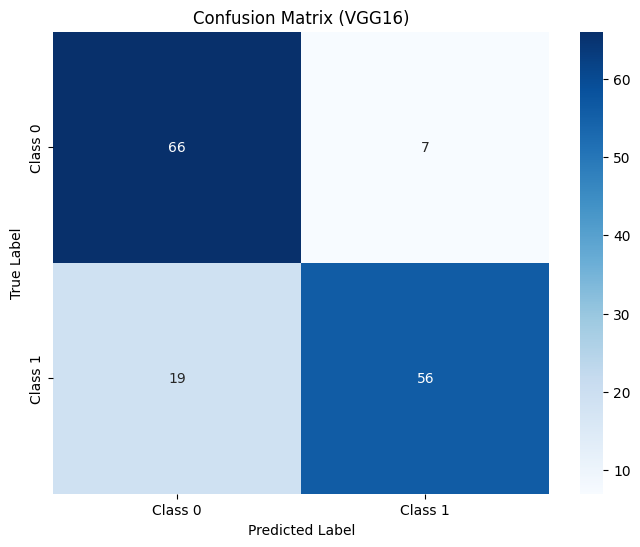

Image 1: True Label: 1, Predicted Label: 1
Image 2: True Label: 1, Predicted Label: 0
Image 3: True Label: 0, Predicted Label: 0
Image 4: True Label: 1, Predicted Label: 1
Image 5: True Label: 1, Predicted Label: 1
Image 6: True Label: 0, Predicted Label: 0
Image 7: True Label: 0, Predicted Label: 0
Image 8: True Label: 0, Predicted Label: 0
Image 9: True Label: 1, Predicted Label: 1
Image 10: True Label: 1, Predicted Label: 1
Image 11: True Label: 1, Predicted Label: 0
Image 12: True Label: 0, Predicted Label: 0
Image 13: True Label: 0, Predicted Label: 0
Image 14: True Label: 0, Predicted Label: 0
Image 15: True Label: 0, Predicted Label: 0
Image 16: True Label: 0, Predicted Label: 0
Image 17: True Label: 1, Predicted Label: 1
Image 18: True Label: 0, Predicted Label: 1
Image 19: True Label: 1, Predicted Label: 1
Image 20: True Label: 0, Predicted Label: 0
Image 21: True Label: 1, Predicted Label: 1
Image 22: True Label: 1, Predicted Label: 1
Image 23: True Label: 1, Predicted Label:

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import load_model

# Load the trained VGG16 model
vgg16_model = load_model('/content/vgg16_model.h5')  # Path to the saved VGG16 model

# Debug: Check test data shape and content
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")
print(f"Sample test labels (one-hot): {test_labels[:10]}")

# Convert one-hot encoded test labels to integer format
test_labels_int = test_labels if len(test_labels.shape) == 1 else np.argmax(test_labels, axis=1)

# Predict using the VGG16 model
vgg16_predictions = vgg16_model.predict(test_images)
vgg16_predicted_classes = np.argmax(vgg16_predictions, axis=1)  # Convert predictions to class indices

# Calculate accuracy
vgg16_test_accuracy = accuracy_score(test_labels_int, vgg16_predicted_classes)
print(f"VGG16 Test Accuracy: {vgg16_test_accuracy * 100:.2f}%")

# Generate classification report
print("\nClassification Report (VGG16):")
target_names = [f"Class {cls}" for cls in np.unique(test_labels_int)]  # Dynamically create target names
print(classification_report(test_labels_int, vgg16_predicted_classes, target_names=target_names))

# Generate confusion matrix
print("\nConfusion Matrix (VGG16):")
vgg16_conf_matrix = confusion_matrix(test_labels_int, vgg16_predicted_classes)
print(vgg16_conf_matrix)

# Optional: Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(vgg16_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix (VGG16)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Optionally: Print individual predictions for each test image
for i, (true_label, pred_label) in enumerate(zip(test_labels_int, vgg16_predicted_classes)):
    print(f"Image {i + 1}: True Label: {true_label}, Predicted Label: {pred_label}")


# u net

In [ ]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate
from tensorflow.keras.layers import Conv2DTranspose, BatchNormalization, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import to_categorical

# Paths for aug_yes and no
aug_yes_csv_path = "/content/organized_data/aug_yes/csv/data.csv"
aug_yes_images_folder = "/content/organized_data/aug_yes/images"

no_csv_path = "/content/organized_data/no/csv/data.csv"
no_images_folder = "/content/organized_data/no/images"

# Load CSVs
data_yes = pd.read_csv(aug_yes_csv_path)
data_yes['label'] = 1  # Assign label 1 for "yes"

data_no = pd.read_csv(no_csv_path)
data_no['label'] = 0  # Assign label 0 for "no"

# Combine both classes and shuffle
data = pd.concat([data_yes, data_no], ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split data into train, validation, and test sets (70:15:15) while maintaining label balance
train_data, temp_data = train_test_split(data, test_size=0.3, stratify=data['label'], random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['label'], random_state=42)

# Function to preprocess images and create data lists
def preprocess_and_load_data(data_subset, folder_paths):
    images = []
    labels = []

    for _, row in data_subset.iterrows():
        filename = row["Filename"]
        label = row["label"]
        # Determine the folder based on the label
        image_folder = folder_paths['yes'] if label == 1 else folder_paths['no']
        image_path = os.path.join(image_folder, filename)

        if os.path.exists(image_path):
            # Load the image and resize to (224, 224) for U-Net
            img = load_img(image_path, target_size=(224, 224))
            img_array = img_to_array(img)
            img_preprocessed = preprocess_input(img_array)  # Using the same preprocessing

            images.append(img_preprocessed)
            labels.append(label)

    return np.array(images), np.array(labels)

# Define image folder paths for both labels
folder_paths = {
    "yes": aug_yes_images_folder,
    "no": no_images_folder
}

# Preprocess and load data for train, validation, and test sets
train_images, train_labels = preprocess_and_load_data(train_data, folder_paths)
valid_images, valid_labels = preprocess_and_load_data(valid_data, folder_paths)
test_images, test_labels = preprocess_and_load_data(test_data, folder_paths)

# One-hot encode the labels
num_classes = 2  # Glaucoma has two classes: 0 and 1
train_labels = to_categorical(train_labels, num_classes=num_classes)
valid_labels = to_categorical(valid_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)

# Output the shapes of the data
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Validation images shape: {valid_images.shape}")
print(f"Validation labels shape: {valid_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

# Print class distribution in each split
print("Class distribution in Train:", np.sum(train_labels, axis=0))
print("Class distribution in Validation:", np.sum(valid_labels, axis=0))
print("Class distribution in Test:", np.sum(test_labels, axis=0))

# Define data augmentation for the training set
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define U-Net model
def create_unet_model(input_shape, num_classes):
    # Input layer
    inputs = Input(input_shape)

    # Encoder (Contracting Path)
    # Level 1
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    # Level 2
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Level 3
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Level 4
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottleneck
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Decoder (Expanding Path)
    # Level 4
    up6 = Conv2DTranspose(512, 3, strides=(2, 2), padding='same')(drop5)
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)

    # Level 3
    up7 = Conv2DTranspose(256, 3, strides=(2, 2), padding='same')(conv6)
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)

    # Level 2
    up8 = Conv2DTranspose(128, 3, strides=(2, 2), padding='same')(conv7)
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)

    # Level 1
    up9 = Conv2DTranspose(64, 3, strides=(2, 2), padding='same')(conv8)
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)

    # Classification head
    gap = GlobalAveragePooling2D()(conv9)
    dense = Dense(64, activation='relu')(gap)
    outputs = Dense(num_classes, activation='softmax')(dense)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile model
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss=tf.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model

def lr_schedule(epoch, lr):
    # Example: Decrease learning rate by 10% every 5 epochs
    if epoch % 5 == 0 and epoch > 0:
        lr *= 0.9
    return float(lr)  # Ensure the return value is a float

# Create LearningRateScheduler callback
learning_rate_scheduler = LearningRateScheduler(lr_schedule)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Model configuration
input_shape = (224, 224, 3)
num_classes = 2  # Yes and No classes
model = create_unet_model(input_shape, num_classes)

# Display model summary
model.summary()

# Training the model
history = model.fit(
    data_gen.flow(train_images, train_labels, batch_size=16),  # Smaller batch size for U-Net
    epochs=15,
    validation_data=(valid_images, valid_labels),
    callbacks=[early_stopping, learning_rate_scheduler]
)

# Create directory if it doesn't exist
save_dir = '/content/working'
os.makedirs(save_dir, exist_ok=True)

# Ensure file paths are valid
weights_path = './unet_model_weights.weights.h5'
model_path = './unet_model.h5'

# Debug paths
print(f"Saving weights to: {weights_path}")
print(f"Saving model to: {model_path}")

# Save weights and model
model.save_weights(weights_path)
model.save(model_path)

print("Model and weights saved successfully!")

# Evaluate the model
results = model.evaluate(valid_images, valid_labels, batch_size=16)
print(f"Validation Loss: {results[0]}, Validation Accuracy: {results[1]}")

# Evaluate on test set and generate metrics
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Debug: Check test shapes and content
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")
print(f"Test labels content: {test_labels[:10]}")  # Sample labels

# Convert one-hot encoded labels to integers
test_labels_int = np.argmax(test_labels, axis=1)

# Load your trained model
model = tf.keras.models.load_model("./unet_model.h5")

# Predict using the trained model
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)  # Convert predictions to class indices

# Calculate accuracy
accuracy = accuracy_score(test_labels_int, predicted_classes)
print(f"Manual Test Accuracy: {accuracy * 100:.2f}%")

# Classification Report
unique_classes = np.unique(test_labels_int)  # Get unique classes
target_names = [f"Class {cls}" for cls in unique_classes]  # Dynamically create target names

print("\nClassification Report:")
print(classification_report(test_labels_int, predicted_classes, target_names=target_names))

# Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(test_labels_int, predicted_classes)
print(conf_matrix)

# Print predictions for each image
for i, (true_label, pred_label) in enumerate(zip(test_labels_int, predicted_classes)):
    print(f"Image {i + 1}: True Label: {true_label}, Predicted Label: {pred_label}")


Train images shape: (690, 224, 224, 3)
Train labels shape: (690, 2)
Validation images shape: (148, 224, 224, 3)
Validation labels shape: (148, 2)
Test images shape: (148, 224, 224, 3)
Test labels shape: (148, 2)
Class distribution in Train: [337. 353.]
Class distribution in Validation: [72. 76.]
Class distribution in Test: [73. 75.]


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 224, 224,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 224, 224,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 224, 224,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 112, 112,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 112, 112,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 56, 56,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │      1,024 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 28, 28,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 28, 28,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │      2,048 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 28, 28,    │          0 │ batch_normalizat

 Total params: 34,529,346 (131.72 MB)

 Trainable params: 34,523,458 (131.70 MB)

 Non-trainable params: 5,888 (23.00 KB)

Epoch 1/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.6069 - loss: 0.6727 - val_accuracy: 0.5135 - val_loss: 0.7072 - learning_rate: 1.0000e-04
Epoch 2/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 740ms/step - accuracy: 0.6377 - loss: 0.6406 - val_accuracy: 0.5203 - val_loss: 0.7164 - learning_rate: 1.0000e-04
Epoch 3/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 760ms/step - accuracy: 0.6590 - loss: 0.6197 - val_accuracy: 0.5405 - val_loss: 0.7031 - learning_rate: 1.0000e-04
Epoch 4/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 32s 731ms/step - accuracy: 0.6946 - loss: 0.6137 - val_accuracy: 0.6554 - val_loss: 0.6588 - learning_rate: 1.0000e-04
Epoch 5/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 745ms/step - accuracy: 0.6859 - loss: 0.6035 - val_accuracy: 0.6689 - val_loss: 0.6370 - learning_rate: 1.0000e-04
Epoch 6/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 755ms/step - accuracy: 0.7159 - loss: 0.5792 - val_accuracy: 0.6554 - val_loss: 0.5981 - learning_rate: 9.0000e-05
Epoch 7/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 738ms/step - accur

Model and weights saved successfully!
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7431 - loss: 0.5028
Validation Loss: 0.5062748789787292, Validation Accuracy: 0.7432432174682617
Test images shape: (148, 224, 224, 3)
Test labels shape: (148, 2)
Test labels content: [[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 710ms/step
Manual Test Accuracy: 75.00%

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.86      0.59      0.70        73
     Class 1       0.69      0.91      0.79        75

    accuracy                           0.75       148
   macro avg       0.78      0.75      0.74       148
weighted avg       0.78      0.75      0.74       148


Confusion Matrix:
[[43 30]
 [ 7 68]]
Image 1: True Label: 1, Predicted Label: 1
Image 2: True Label: 1, Predicted Label: 0
Image 3: True Label: 0, Predicted Label: 0
Image 4: True Label: 1, Predicted Label: 0
Image 5: True Label: 1, Predicted Label: 1
Image 6: True Label: 0, Predicted Label: 0
Image 7: True Label: 0, Predicted Label: 0
Image 8: True Label: 0, Predicted Label: 1
Image 9: True Label: 1, Predicted Label: 1
Image 10: True Label: 1, Predicted Label: 1
Image 11: True Label: 1, Predicted Label: 1
Image 12: True Label: 0, Predicted Label: 1
Image 13: True Label: 0,

# EfficientNetB0

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
# --- CHANGE: Import EfficientNetB0 and its preprocessing ---
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
# --- END CHANGE ---
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout # Added Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# REMOVED: ResNet50 specific imports if any were left

# Paths for aug_yes and no
# Make sure these paths are correct in your Colab environment
aug_yes_csv_path = "/content/organized_data/aug_yes/csv/data.csv"
aug_yes_images_folder = "/content/organized_data/aug_yes/images"

no_csv_path = "/content/organized_data/no/csv/data.csv"
no_images_folder = "/content/organized_data/no/images"

# Load CSVs
try:
    data_yes = pd.read_csv(aug_yes_csv_path)
    data_yes['label'] = 1 # Assign label 1 for "yes"

    data_no = pd.read_csv(no_csv_path)
    data_no['label'] = 0 # Assign label 0 for "no"
except FileNotFoundError as e:
    print(f"Error loading CSV: {e}. Please ensure paths are correct.")
    # Handle error appropriately, maybe exit or use dummy data for testing structure
    exit()


# Combine both classes and shuffle
data = pd.concat([data_yes, data_no], ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split data into train, validation, and test sets (70:15:15) while maintaining label balance
train_data, temp_data = train_test_split(data, test_size=0.3, stratify=data['label'], random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['label'], random_state=42)

# --- Define Target Size --- EfficientNetB0 default input size
INPUT_TARGET_SIZE = (224, 224)

# Function to preprocess images and create data lists
def preprocess_and_load_data(data_subset, folder_paths, target_size=INPUT_TARGET_SIZE):
    images = []
    labels = []

    for _, row in data_subset.iterrows():
        filename = row["Filename"]
        label = row["label"]
        # Determine the folder based on the label
        image_folder = folder_paths['yes'] if label == 1 else folder_paths['no']
        image_path = os.path.join(image_folder, filename)

        if os.path.exists(image_path):
            # Load the image and resize
            img = load_img(image_path, target_size=target_size)
            img_array = img_to_array(img)

            # --- CHANGE: Use EfficientNet-specific Preprocessing ---
            # This function handles the specific scaling and normalization for EfficientNet
            img_preprocessed = preprocess_input(img_array)
            # --- END CHANGE ---

            images.append(img_preprocessed)
            labels.append(label)
        else:
             print(f"Warning: Image file not found at {image_path}")


    return np.array(images), np.array(labels)

# Define image folder paths for both labels
folder_paths = {
    "yes": aug_yes_images_folder,
    "no": no_images_folder
}

# Preprocess and load data for train, validation, and test sets
print("Preprocessing training data...")
train_images, train_labels = preprocess_and_load_data(train_data, folder_paths)
print("Preprocessing validation data...")
valid_images, valid_labels = preprocess_and_load_data(valid_data, folder_paths)
print("Preprocessing test data...")
test_images, test_labels = preprocess_and_load_data(test_data, folder_paths)


# One-hot encode the labels
num_classes = 2 # Glaucoma has two classes: 0 and 1
train_labels = to_categorical(train_labels, num_classes=num_classes)
valid_labels = to_categorical(valid_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)

# Output the shapes of the data
print(f"\nTrain images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Validation images shape: {valid_images.shape}")
print(f"Validation labels shape: {valid_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

# Basic check if data was loaded
if train_images.shape[0] == 0 or valid_images.shape[0] == 0 or test_images.shape[0] == 0:
    print("\nError: One or more data splits are empty. Check CSV paths, image folders, and file existence.")
    exit()

# Print class distribution in each split
print("\nClass distribution in Train:", np.sum(train_labels, axis=0))
print("Class distribution in Validation:", np.sum(valid_labels, axis=0))
print("Class distribution in Test:", np.sum(test_labels, axis=0))


# Define data augmentation for the training set
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
    # Note: EfficientNet preprocess_input handles scaling, so no rescale=1./255 here
)

# --- NEW: Define EfficientNetB0 model ---
def create_efficientnet_model(input_shape, num_classes):
    # Load EfficientNetB0 base model with pre-trained ImageNet weights
    base_model = EfficientNetB0(
        weights='imagenet',
        include_top=False, # Do not include the ImageNet classifier at the top.
        input_shape=input_shape,
        pooling=None # Set pooling to None, we will add GlobalAveragePooling2D manually
    )

    # Freeze the base model layers so they are not updated during initial training
    base_model.trainable = False

    # Add custom layers on top
    x = base_model.output
    x = GlobalAveragePooling2D(name='global_avg_pool')(x)
    # Add a dropout layer for regularization - common practice in transfer learning
    x = Dropout(0.2, name='top_dropout')(x) # Dropout rate can be tuned
    # Final classification layer
    predictions = Dense(num_classes, activation='softmax', name='predictions')(x)

    # Combine base model and custom layers
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    # Using a standard learning rate for the initial training phase
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss=tf.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model
# --- END: Define EfficientNetB0 Model ---


# Learning rate schedule function (ensure float output)
def lr_schedule(epoch, lr):
    # Example: Decrease learning rate by 10% every 5 epochs
    # Keep it simple for now, fine-tuning might need a different schedule
    if epoch % 5 == 0 and epoch > 0:
        lr *= 0.9
    return float(lr)

# Create LearningRateScheduler callback
learning_rate_scheduler = LearningRateScheduler(lr_schedule)

# Callbacks
# Increase patience slightly as transfer learning might take a bit longer to stabilize
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model configuration
input_shape = INPUT_TARGET_SIZE + (3,) # Should be (224, 224, 3)
num_classes = 2 # Yes and No classes

# --- CHANGE: Create EfficientNetB0 model instance ---
print("\nCreating EfficientNetB0 model...")
model = create_efficientnet_model(input_shape, num_classes)
model.summary() # Print model architecture
# --- END CHANGE ---

# Training the model
print(f"\nStarting training with {train_images.shape[0]} images...")
# Consider reducing batch_size if you hit memory limits on Colab free tier (e.g., 16 or 8)
BATCH_SIZE = 32
EPOCHS = 25 # Might need more/less depending on convergence

history = model.fit(
    data_gen.flow(train_images, train_labels, batch_size=BATCH_SIZE),
    epochs=EPOCHS,
    validation_data=(valid_images, valid_labels),
    callbacks=[early_stopping, learning_rate_scheduler],
    steps_per_epoch=len(train_images) // BATCH_SIZE, # Ensure generator runs expected steps
    validation_steps=len(valid_images) // BATCH_SIZE # Ensure validation runs expected steps
)

# --- Optional: Fine-tuning Phase ---
# After the initial training with the base frozen, you can unfreeze some layers
# of the base model and train with a much lower learning rate.

# print("\nStarting Fine-tuning phase...")
# base_model = model.layers[0] # Get the base EfficientNet model layer
# base_model.trainable = True

# # Choose how many layers towards the end to fine-tune
# # Fine-tune from this layer onwards
# fine_tune_at = 100 # Example: ~ Block 6 or 7 of EfficientNetB0

# # Freeze all the layers before the `fine_tune_at` layer
# for layer in base_model.layers[:fine_tune_at]:
#     layer.trainable = False

# # Compile the model with a very low learning rate for fine-tuning
# model.compile(optimizer=Adam(learning_rate=1e-5), # Much lower learning rate
#               loss=tf.losses.CategoricalCrossentropy(),
#               metrics=['accuracy'])

# model.summary() # See which layers are trainable now

# # Continue training for a few more epochs
# FINE_TUNE_EPOCHS = 10
# total_epochs = EPOCHS + FINE_TUNE_EPOCHS

# history_fine = model.fit(
#     data_gen.flow(train_images, train_labels, batch_size=BATCH_SIZE),
#     epochs=total_epochs,
#     initial_epoch=history.epoch[-1] + 1, # Start from where previous training stopped
#     validation_data=(valid_images, valid_labels),
#     callbacks=[early_stopping, learning_rate_scheduler], # Reuse or adjust callbacks
#     steps_per_epoch=len(train_images) // BATCH_SIZE,
#     validation_steps=len(valid_images) // BATCH_SIZE
# )
# --- End Optional Fine-tuning ---


# Create directory if it doesn't exist
save_dir = '/content/working' # Standard Colab working directory
os.makedirs(save_dir, exist_ok=True)

# --- CHANGE: Update save paths for EfficientNetB0 ---
weights_path = os.path.join(save_dir,'efficientnetb0_model_weights.weights.h5')
model_path = os.path.join(save_dir,'efficientnetb0_model.h5')
# --- END CHANGE ---

# Debug paths
print(f"\nSaving weights to: {weights_path}")
print(f"Saving model to: {model_path}")

# Save weights and model
model.save_weights(weights_path)
model.save(model_path)

print("EfficientNetB0 Model and weights saved successfully!")

# Evaluate the model on validation data
print("\nEvaluating model on Validation set...")
results = model.evaluate(valid_images, valid_labels, batch_size=BATCH_SIZE)
print(f"Validation Loss: {results[0]:.4f}, Validation Accuracy: {results[1]:.4f}")

# --- Evaluation on Test Set (using the saved EfficientNetB0 model) ---
import numpy as np
# import tensorflow as tf # Already imported
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert one-hot encoded test labels back to integer format for scikit-learn metrics
test_labels_int = np.argmax(test_labels, axis=1)

# --- CHANGE: Load the saved EfficientNetB0 model ---
try:
    print(f"\nLoading EfficientNetB0 model from: {model_path}")
    # Load the model (ensure custom objects are handled if needed, though usually not for this structure)
    loaded_model = tf.keras.models.load_model(model_path)
except Exception as e:
    print(f"Error loading model: {e}")
    print("Skipping test set evaluation.")
    exit() # Or handle error appropriately
# --- END CHANGE ---


# Check if test_images is empty
if test_images.shape[0] == 0:
     print("\nError: No test images loaded. Skipping prediction.")
else:
    print("\nEvaluating model on Test set...")
    # Predict using the loaded model
    predictions = loaded_model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1) # Convert predictions to class indices

    # Calculate accuracy
    accuracy = accuracy_score(test_labels_int, predicted_classes)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

    # Classification Report
    unique_classes = np.unique(test_labels_int) # Get unique classes
    target_names = [f"Class {cls}" for cls in unique_classes] # Dynamically create target names

    print("\nClassification Report:")
    # Add zero_division=0 to handle cases where a class might have no predicted samples
    print(classification_report(test_labels_int, predicted_classes, target_names=target_names, zero_division=0))

    # Confusion Matrix
    print("\nConfusion Matrix:")
    conf_matrix = confusion_matrix(test_labels_int, predicted_classes)
    print(conf_matrix)

    # Optional: Print predictions for first few test images
    # print("\nPredictions vs True Labels (first 10):")
    # for i in range(min(10, len(test_labels_int))):
    #      print(f"Image {i + 1}: True Label: {test_labels_int[i]}, Predicted Label: {predicted_classes[i]}")

Preprocessing training data...
Preprocessing validation data...
Preprocessing test data...

Train images shape: (690, 224, 224, 3)
Train labels shape: (690, 2)
Validation images shape: (148, 224, 224, 3)
Validation labels shape: (148, 2)
Test images shape: (148, 224, 224, 3)
Test labels shape: (148, 2)

Class distribution in Train: [337. 353.]
Class distribution in Validation: [72. 76.]
Class distribution in Test: [73. 75.]

Creating EfficientNetB0 model...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,052,133 (15.46 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 4,049,571 (15.45 MB)


Starting training with 690 images...
Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.4757 - loss: 0.7434 - val_accuracy: 0.5676 - val_loss: 0.6790 - learning_rate: 1.0000e-04
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5312 - loss: 0.6991 - val_accuracy: 0.5676 - val_loss: 0.6776 - learning_rate: 1.0000e-04
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 359ms/step - accuracy: 0.5731 - loss: 0.6876 - val_accuracy: 0.6216 - val_loss: 0.6557 - learning_rate: 1.0000e-04
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5938 - loss: 0.6692 - val_accuracy: 0.6284 - val_loss: 0.6555 - learning_rate: 1.0000e-04
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 327ms/step - accuracy: 0.5599 - loss: 0.7000 - val_accuracy: 0.6216 - val_loss: 0.6382 - learning_rate: 1.0000e-04
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3333 - loss: 0.7893 - val_accuracy: 0.6081 - val_loss: 0.6380 - learning_rate: 9.0000e-05
Epoch 7/25
21/21 ━━━━━━━━━━━━━━

EfficientNetB0 Model and weights saved successfully!

Evaluating model on Validation set...
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6669 - loss: 0.5815
Validation Loss: 0.5837, Validation Accuracy: 0.6622

Loading EfficientNetB0 model from: /content/working/efficientnetb0_model.h5



Evaluating model on Test set...
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Test Accuracy: 65.54%

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.59      0.99      0.74        73
     Class 1       0.96      0.33      0.50        75

    accuracy                           0.66       148
   macro avg       0.78      0.66      0.62       148
weighted avg       0.78      0.66      0.62       148


Confusion Matrix:
[[72  1]
 [50 25]]


# Front end start from here

# Front end For resnet 50

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import tensorflow as tf  # Or import your model's framework
import numpy as np
from PIL import Image

In [ ]:
# Load the saved model (replace 'path/to/your/model.h5' with the actual path)
model = tf.keras.models.load_model('/content/resnet50_model.h5')

In [ ]:
import json

def predict_image(image):
    # Preprocess the image (resize, normalize, etc.)
    img = image.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction using the loaded model
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Construct the JSON response manually
    result = {
        "prediction": "Glaucoma" if predicted_class == 1 else "No Glaucoma",
        "probability": prediction[0][predicted_class].item()
    }


    # Return the JSON response as a string
    return json.dumps(result)

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input  # Import if using ResNet50
import numpy as np
import json
from PIL import Image

def predict_image(image):
         img = image.resize((224, 224))  # Resize to the input size of your model
         img_array = np.array(img)

         img_array = preprocess_input(img_array)  # Preprocess as per your model's architecture
         img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

         prediction = model.predict(img_array)
         predicted_class = np.argmax(prediction)

         result = {
             "prediction": "Glaucoma" if predicted_class == 1 else "No Glaucoma",
             "probability": prediction[0][predicted_class].item()
         }

         return json.dumps(result)

In [ ]:
iface = gr.Interface(
        fn=predict_image,
        inputs=gr.Image(type="pil"),
        outputs="text",  # or gr.Textbox()
        title="Glaucoma Detection",
        description="Upload an image to detect Glaucoma.",
    )

iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7bca26a18b449008ac.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Front end for VGG16 model

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input  # Import VGG16 preprocessing
import numpy as np
import json
from PIL import Image

def predict_image(image):
         img = image.resize((224, 224))
         img_array = np.array(img)

         img_array = preprocess_input(img_array)  # Use VGG16 preprocessing
         img_array = np.expand_dims(img_array, axis=0)

         prediction = model.predict(img_array)
         predicted_class = np.argmax(prediction)

         result = {
             "prediction": "Glaucoma" if predicted_class == 1 else "No Glaucoma",
             "probability": prediction[0][predicted_class].item()
         }

         return json.dumps(result)

In [ ]:
import gradio as gr
import hashlib  # For basic password hashing

# Store user credentials in a dictionary (for demonstration purposes)
users = {}  # Initialize empty dictionary

# Function to hash passwords
def hash_password(password):
    return hashlib.sha256(password.encode()).hexdigest()

def predict_image(image, is_logged_in, username):
    """Makes a prediction if the user is logged in."""
    if is_logged_in:
        # Load and preprocess the image
        img = image.resize((224, 224))
        img_array = np.array(img)
        img_array = preprocess_input(img_array)  # Preprocess for your model
        img_array = np.expand_dims(img_array, axis=0)

        # Make prediction
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)
        probability = prediction[0][predicted_class].item()

        return f"Prediction: {'Glaucoma' if predicted_class == 1 else 'No Glaucoma'}\nProbability: {probability:.2f}"
    else:
        return "Please log in to make a prediction."

def create_account(username, password):
    """Creates a new user account."""
    if username in users:
        return "Username already exists. Please choose another."
    else:
        users[username] = hash_password(password)  # Store hashed password
        return "Account created successfully! You can now log in."

def login(username, password):
    """Logs in the user if credentials match."""
    if username in users and users[username] == hash_password(password):
        return "Login successful!", True, username, gr.update(visible=True), gr.update(visible=False)  # is_logged_in, username, prediction_tab, login_button
    else:
        return "Incorrect username or password.", False, "", gr.update(visible=False), gr.update(visible=True)  # is_logged_in, username, prediction_tab, login_button


# Create the Gradio interface
with gr.Blocks() as demo:
    # Account Creation Section
    with gr.Tab("Create Account"):
        with gr.Row():
            new_username = gr.Textbox(label="Username")
            new_password = gr.Textbox(label="Password", type="password")
        create_account_button = gr.Button("Create Account")
        create_account_message = gr.Textbox(label="Message")
        create_account_button.click(create_account, inputs=[new_username, new_password], outputs=create_account_message)

    # Login Section
    with gr.Tab("Login"):
        with gr.Row():
            username = gr.Textbox(label="Username")
            password = gr.Textbox(label="Password", type="password")
        login_button = gr.Button("Login")
        login_message = gr.Textbox(label="Message")

        # State variables
        is_logged_in = gr.State(False)  # Initialize is_logged_in to False
        logged_in_username = gr.State("")  # Initialize logged_in_username to empty string

        # Define prediction_tab and image_input outside the click function
        prediction_tab = gr.Tab("Glaucoma Detection", visible=False)
        with prediction_tab:
            with gr.Row():
                image_input = gr.Image(type="pil", label="Upload Image")
                prediction_output = gr.Textbox(label="Prediction")
            image_input.change(predict_image, inputs=[image_input, is_logged_in, logged_in_username], outputs=prediction_output)

        # Now use prediction_tab and image_input in the click function
        login_button.click(login, inputs=[username, password],
                        outputs=[login_message, is_logged_in, logged_in_username, prediction_tab, login_button])

demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://70ea478d3c665916e2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
